In [41]:
import pandas as pd
import numpy as np

# Loading the dataset

In [42]:
weather = pd.read_csv("data/weather.csv", index_col="DATE")
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,21.25,NaN,1104.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,11.41,NaN,934.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,6.04,NaN,836.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning the dataset

In [43]:
for index, row in weather.iterrows():
	weather.loc[index, "TAVG"] = np.average([weather.loc[index, "TMIN"], weather.loc[index, "TMAX"]])

In [44]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.521022
ACSH       0.520972
AWND       0.256302
FMTM       0.495666
PGTM       0.387915
PRCP       0.000000
SNOW       0.000050
SNWD       0.000199
TAVG       0.000000
TMAX       0.000000
TMIN       0.000000
TSUN       0.998456
WDF1       0.521221
WDF2       0.480572
WDF5       0.484707
WDFG       0.744894
WDFM       0.999950
WESD       0.697569
WSF1       0.521072
WSF2       0.480572
WSF5       0.484756
WSFG       0.628226
WSFM       0.999950
WT01       0.631563
WT02       0.934991
WT03       0.932948
WT04       0.982764
WT05       0.981867
WT06       0.990934
WT07       0.994620
WT08       0.802879
WT09       0.993026
WT11       0.999303
WT13       0.891153
WT14       0.955813
WT15       0.997908
WT16       0.672362
WT17       0.997011
WT18       0.941865
WT19       0.999950
WT21       0.999751
WT22       0.997559
WV01       0.999950
dtype: float64

In [45]:
null_prct = weather.apply(pd.isnull).sum()/weather.shape[0]
valid_columns = weather.columns[null_prct < 0.05]
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN'], dtype='object')

In [46]:
weather = weather[valid_columns].copy()
weather.columns = weather.columns.str.lower()
weather

,station,name,prcp,snow,snwd,tavg,tmax,tmin
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,26.5,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,31.5,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,27.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28.0,35,21
...,...,...,...,...,...,...,...,...
2024-12-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,37.5,44,31
2024-12-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,32.0,37,27
2024-12-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,37,25


In [47]:
#weather.fillna(weather["snwd"].mean(), inplace=True)
weather.ffill(inplace=True) # I thnk this one it's better because if the day before didn't snow, it's most like that the day after that won't snow

In [48]:
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tavg       0
tmax       0
tmin       0
dtype: int64

In [49]:
weather

,station,name,prcp,snow,snwd,tavg,tmax,tmin
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,26.5,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,31.5,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,27.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28.0,35,21
...,...,...,...,...,...,...,...,...
2024-12-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,37.5,44,31
2024-12-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,32.0,37,27
2024-12-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,37,25


# Prepping data for machine learning

### First I have to make shure that the columns have the right data type. ie: the inches of snow are in float type

In [50]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tavg       float64
tmax         int64
tmin         int64
dtype: object

### So, we have to change the type of the indexes because it's a object type, but it should be a datetime because it'll be easier for the model to work with

In [51]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2024-12-07', '2024-12-08', '2024-12-09', '2024-12-10', '2024-12-11',
       '2024-12-12', '2024-12-13', '2024-12-14', '2024-12-15', '2024-12-16'],
      dtype='object', name='DATE', length=20074)

In [52]:
weather.index = pd.to_datetime(weather.index)

### I have to make sure that there are not many gaps in the dataset otherwise I wont be able to make predictions

In [53]:
weather.index.year.value_counts().sort_index()

DATE
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    351
Name: count, dtype: int64

<Axes: xlabel='DATE'>

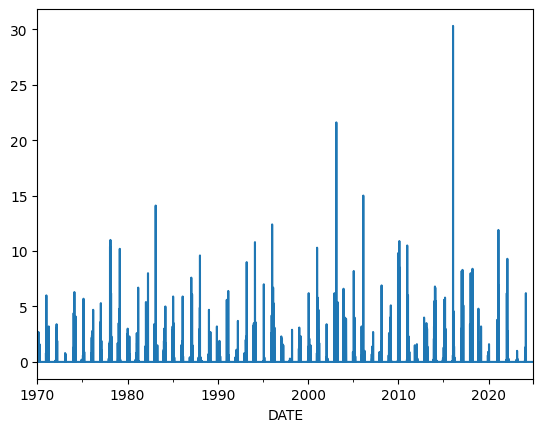

In [54]:
weather["snow"].plot()

### What i'll be trying to predict it's tomorrows weather based on the data that I have

In [55]:
weather["target"] = weather.shift(-1)["tmax"]
weather

,station,name,prcp,snow,snwd,tavg,tmax,tmin,target
DATE,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,26.5,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,31.5,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,27.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28.0,35,21,36.0
...,...,...,...,...,...,...,...,...,...
2024-12-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,37.5,44,31,37.0
2024-12-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,32.0,37,27,37.0
2024-12-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,37,25,43.0


### Now there is a na value, in this case, i'll use ffill although it's not technically correct

In [56]:
weather.ffill(inplace=True)

In [57]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tavg       float64
tmax         int64
tmin         int64
target     float64
dtype: object

In [58]:
weather.corr(numeric_only=True)

,prcp,snow,snwd,tavg,tmax,tmin,target
prcp,1.000000,0.146667,0.001127,0.020361,-0.008836,0.050855,-0.004977
snow,0.146667,1.000000,0.234348,-0.167868,-0.173637,-0.157852,-0.171301
snwd,0.001127,0.234348,1.000000,-0.258456,-0.256996,-0.254005,-0.238451
tavg,0.020361,-0.167868,-0.258456,1.000000,0.989381,0.988046,0.925519
tmax,-0.008836,-0.173637,-0.256996,0.989381,1.000000,0.955149,0.915210
tmin,0.050855,-0.157852,-0.254005,0.988046,0.955149,1.000000,0.914966
target,-0.004977,-0.171301,-0.238451,0.925519,0.915210,0.914966,1.000000


# Training a machine learnign model

In [59]:
from sklearn.linear_model import Ridge

In [60]:
rr = Ridge(alpha=.1)

#### Now to apply the ridge regression model we need to do 2 things:

1) Create a list of predictors columns. Bassicaly are the columns used to traing the maodel and give the target column

In [61]:
predictor = weather.columns[~weather.columns.isin(["station", "name", "target"])]
predictor

Index(['prcp', 'snow', 'snwd', 'tavg', 'tmax', 'tmin'], dtype='object')

#### Tipically when you try to estimate the error of a machine learning model, you can use cross validation except with time series data. With time series data we need to be very careful not to use future data to predict the past, so we need to use a special technique called back testing to account for the time series of the data 

In [62]:
def backtest(weather, model, predictors, start=3650, step=90):
	all_predictions = []

	for i in range(start, weather.shape[0], step):
		train  = weather.iloc[:i, :]
		test = weather.iloc[i:(i+step), :]

		model.fit(train[predictors], train["target"]) 

		preds = model.predict(test[predictors]) # This is an np array so it'll ve hard to work with
		preds = pd.Series(preds, index=test.index) # We changed the np array to a pandas df

		combined = pd.concat([test["target"], preds], axis=1) # Concat target columns and predictions columns as columns
		combined.columns = ["actual", "prediction"] # Name the columns
		combined["diff"] = (combined["prediction"] - combined["actual"]).abs() # Create a diff column to see the delta of the prediction 

		all_predictions.append(combined) 
		
	return pd.concat(all_predictions)


In [63]:
predictions = backtest(weather, rr, predictor)
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,43.0,50.229324,7.229324
1979-12-31,42.0,43.673797,1.673797
1980-01-01,41.0,41.579150,0.579150
1980-01-02,36.0,43.961886,7.961886
1980-01-03,30.0,40.204725,10.204725
...,...,...,...
2024-12-12,37.0,45.458961,8.458961
2024-12-13,37.0,40.244875,3.244875
2024-12-14,43.0,39.220039,3.779961


In [64]:
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tavg       0
tmax       0
tmin       0
target     0
dtype: int64

In [65]:
from sklearn.metrics import mean_absolute_error

#### This means we were off in 5 degrees on average 

In [66]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

5.129808039668472

# Adding more predictors to improve the accuracy

#### The way we are going to improve our accuracy is by calculating the average temperature and precipitation in the past few days and looking how the current day compare to those days. The reason why this will help accuracy it's because some days for random reasons some days you go outside in the middle of the summer and ot's cold or in the winter it's warm, looking in the average in the past days insted of just todays temperature can help if todays temperature was really weird for some reason

In [67]:
def pctr_diff(new, old):
	return (new - old)/old

def compute_rolling(weather, horizon, col):
	label = f"rolling_{horizon}_{col}"
	
	weather[label] = weather[col].rolling(horizon).mean()
	weather[f"{label}_pct"] = pctr_diff(weather[label], weather[col])
	return weather

rolling_horizons = [3, 14]

for horizon in rolling_horizons:
	for col in ["tmax", "tmin", "prcp"]:
		weather = compute_rolling(weather, horizon, col)

weather

,station,name,prcp,snow,snwd,tavg,tmax,tmin,target,rolling_3_tmax,...,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25.0,28,22,31.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,26.5,31,22,38.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,31.5,38,25,31.0,32.333333,...,23.000000,-0.080000,0.006667,-0.666667,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,27.0,31,23,35.0,33.333333,...,23.333333,0.014493,0.006667,inf,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28.0,35,21,36.0,34.666667,...,23.000000,0.095238,0.006667,inf,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,37.5,44,31,37.0,53.666667,...,39.666667,0.279570,0.336667,inf,47.285714,0.074675,34.000000,0.096774,0.100000,inf
2024-12-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,32.0,37,27,37.0,47.333333,...,33.666667,0.246914,0.293333,inf,46.285714,0.250965,33.357143,0.235450,0.100000,inf
2024-12-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,37,25,43.0,39.333333,...,27.666667,0.106667,0.000000,NaN,45.928571,0.241313,32.857143,0.314286,0.100000,inf


#### So there are 14 values missing on the firts 14 rows because rolling takes those 14 windows to make the average to the 14 row onward 

In [68]:
weather = weather.iloc[14:, :]

#### There are some missing values and it's because we are dividing either by 0 or 0 

In [75]:
weather = weather.fillna(0)
weather.replace([np.inf, -np.inf], 0, inplace=True)

In [72]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)
    
weather

,station,name,prcp,snow,snwd,tavg,tmax,tmin,target,rolling_3_tmax,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,21.0,29,13,36.0,29.666667,...,18.857143,0.450549,0.022857,inf,29.000000,29.000000,13.000000,13.000000,0.000000,0.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28.5,36,21,43.0,30.333333,...,18.785714,-0.105442,0.022857,inf,32.500000,36.000000,17.000000,21.000000,0.000000,0.000000
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,36.5,43,30,42.0,36.000000,...,19.142857,-0.361905,0.022857,0.142857,36.000000,43.000000,21.333333,30.000000,0.006667,0.020000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,33.5,42,25,25.0,40.333333,...,19.285714,-0.228571,0.030000,-0.700000,37.500000,42.000000,22.250000,25.000000,0.030000,0.100000
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,20.5,25,16,24.0,36.666667,...,18.928571,0.183036,0.030000,inf,35.000000,25.000000,21.000000,16.000000,0.024000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,37.5,44,31,37.0,53.666667,...,34.000000,0.096774,0.100000,inf,44.556346,45.090909,32.174970,32.800000,0.119597,0.151091
2024-12-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,32.0,37,27,37.0,47.333333,...,33.357143,0.235450,0.100000,inf,44.551867,45.018182,32.171903,32.818182,0.119526,0.131273
2024-12-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,37,25,43.0,39.333333,...,32.857143,0.314286,0.100000,inf,44.547393,46.218182,32.167654,32.963636,0.119455,0.120000


In [73]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]
predictors

Index(['prcp', 'snow', 'snwd', 'tavg', 'tmax', 'tmin', 'rolling_3_tmax',
       'rolling_3_tmax_pct', 'rolling_3_tmin', 'rolling_3_tmin_pct',
       'rolling_3_prcp', 'rolling_3_prcp_pct', 'rolling_14_tmax',
       'rolling_14_tmax_pct', 'rolling_14_tmin', 'rolling_14_tmin_pct',
       'rolling_14_prcp', 'rolling_14_prcp_pct', 'month_avg_tmax',
       'day_avg_tmax', 'month_avg_tmin', 'day_avg_tmin', 'month_avg_prcp',
       'day_avg_prcp'],
      dtype='object')

# Diagnostics and next steps

#### The model did a little bit of improve, but no that much, lets see why

In [77]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

4.78220484590745

#### These are the days were the diff was really high, these are kind of anomalous days

In [78]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
1994-01-27,51.0,18.128045,32.871955
1990-03-12,85.0,54.026606,30.973394
2007-03-26,78.0,49.908454,28.091546
1998-03-26,80.0,52.061252,27.938748
2003-04-15,86.0,59.509643,26.490357
...,...,...,...
2000-11-12,52.0,51.998664,0.001336
1981-06-20,78.0,78.001336,0.001336
1984-01-12,27.0,27.000811,0.000811


#### There are some very anomalous days, like 1994-01-27 where the tmin was really low. These days are the ones that make our model to not make that accurate predictions. To improve the results , we should have wind data or atmospheric info to predict those weird days 

In [80]:
weather.loc["1994-01-24": "1994-01-30"]

,station,name,prcp,snow,snwd,tavg,tmax,tmin,target,rolling_3_tmax,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1994-01-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,39.0,47,31,38.0,37.666667,...,15.000000,-0.516129,0.135000,0.000000,38.265252,40.92,25.671088,27.92,0.108660,0.1120
1994-01-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35.5,38,33,33.0,39.333333,...,16.142857,-0.510823,0.135000,0.000000,38.264901,40.40,25.680795,28.56,0.108517,0.1664
1994-01-26,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.28,3.3,2.0,21.0,33,9,34.0,39.333333,...,14.642857,0.626984,0.122857,-0.561224,38.257937,40.24,25.658730,27.88,0.108743,0.1708
1994-01-27,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.07,0.0,3.0,18.0,34,2,51.0,35.000000,...,12.500000,5.250000,0.127857,0.826531,38.252312,38.80,25.627477,26.04,0.108692,0.1296
1994-01-28,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1.31,0.0,1.0,42.5,51,34,43.0,39.333333,...,13.357143,-0.607143,0.221429,-0.830971,38.269129,39.36,25.638522,26.96,0.110277,0.0964
1994-01-29,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,38.5,43,34,36.0,42.666667,...,15.214286,-0.552521,0.221429,0.000000,38.275362,39.28,25.649539,26.80,0.110132,0.0716
1994-01-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,36,26,33.0,43.333333,...,16.785714,-0.354396,0.221429,0.000000,38.272368,39.20,25.650000,27.04,0.109987,0.0812


In [82]:
predictions["diff"].round().value_counts().sort_index()

diff
0.0     1196
1.0     2270
2.0     2091
3.0     1932
4.0     1710
5.0     1426
6.0     1237
7.0     1032
8.0      862
9.0      688
10.0     548
11.0     406
12.0     307
13.0     211
14.0     152
15.0      96
16.0      79
17.0      46
18.0      39
19.0      25
20.0      15
21.0      12
22.0      11
23.0       8
24.0       3
25.0       2
26.0       2
28.0       2
31.0       1
33.0       1
Name: count, dtype: int64